In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as linregress
import numpy as np

In [14]:
cta_bus_path = r"C:\Users\Kaleb\Chicago_Energy\Travel_data\CTA_Average_Bus_Ridership_1999_2020_1 (1).csv"
cta_rail_path = r"C:\Users\Kaleb\Chicago_Energy\Travel_data\CTA_Average_Rail_Station_Ridership_1999_2020_0 (1).csv"
metra_riders_path = r"C:\Users\Kaleb\Chicago_Energy\Travel_data\Metra_Monthly_Ridership_by_Line_2003_2020_0.csv"
yearly_data_path = r"C:\Users\Kaleb\Chicago_Energy\Travel_data\SYSTEMRIDERSHIP_0.csv"
census_data = r"C:\Users\Kaleb\Chicago_Energy\Data\Chicago_Population_Counts_2018.csv"

In [3]:
census_data_csv = pd.read_csv(census_data)
census_df = pd.DataFrame(census_data_csv)
census_df
census_df

,Geography Type,Year,Geography,COMMUNITY AREA NAME,Population - Total
0,Citywide,2018,Chicago,Chicago,2705988
1,ZIP Code,2018,60601,The Loop,14675
2,ZIP Code,2018,60602,The Loop,1244
3,ZIP Code,2018,60603,The Loop,1174
4,ZIP Code,2018,60604,The Loop,782
5,ZIP Code,2018,60605,The Loop,27519
6,ZIP Code,2018,60606,Near West Side,3101
7,ZIP Code,2018,60607,Near West Side,29591
8,ZIP Code,2018,60608,Near West Side,79205
9,ZIP Code,2018,60609,Armour Square,61495


In [4]:
cta_bus_csv = pd.read_csv(cta_bus_path)
cta_rail_csv = pd.read_csv(cta_rail_path)
metra_riders_csv = pd.read_csv(metra_riders_path)
yearly_data_csv = pd.read_csv(yearly_data_path)

In [5]:
cta_bus = pd.DataFrame(cta_bus_csv)
cta_bus = cta_bus.loc[cta_bus["YEAR"] == 2018]

cta_bus

,ROUTE,MONTH,YEAR,DAY_TYPE_ID,AVG_RIDES
5003,79,12.0,2018.0,WK,22436.0
5004,66,12.0,2018.0,WK,19453.0
5005,4,12.0,2018.0,WK,18400.0
5006,8,12.0,2018.0,WK,18280.0
5007,77,12.0,2018.0,WK,17549.0
...,...,...,...,...,...
8778,1001,1.0,2018.0,WK,62.0
8779,1001,1.0,2018.0,SAT,26.0
8780,1001,1.0,2018.0,SUN,21.0
8781,X98,1.0,2018.0,WK,11.0


In [12]:
cta_rail = pd.DataFrame(cta_rail_csv)
cta_rail

,NAME,RIDERSHIP_ID,YEAR,MONTH,DAY_TYPE_ID,TOTAL_RIDES,DAILY_AVG_RIDES
0,18th,830,2020,1,WK,36372.0,1653
1,18th,830,2020,1,SUN,3193.0,638
2,18th,830,2020,1,SAT,3712.0,928
3,35-Bronzeville-IIT,1120,2020,1,WK,32031.0,727
4,35-Bronzeville-IIT,1120,2020,1,SUN,2159.0,215
...,...,...,...,...,...,...,...
111703,Western-Ravenswood,1480,1998,12,SUN,3667.0,733
111704,Western-Ravenswood,1480,1998,12,SAT,6034.0,1508
111705,Wilson,540,1998,12,WK,90844.0,4129
111706,Wilson,540,1998,12,SUN,8695.0,1739


In [10]:
metra_df = pd.DataFrame(metra_riders_csv)
metra_df

,NAME,YEAR,MONTH,RIDES,RIDERSHIP_ID
0,Burlington Northern Santa Fe,2020,1,1258782,10
1,Electric District Blue Island Branch,2020,1,21830,4
2,Electric District Main Line,2020,1,518139,5
3,Electric District South Chicago Branch,2020,1,41378,1
4,Heritage Corridor,2020,1,63296,9
...,...,...,...,...,...
2829,Rock Island District,2002,12,738686,6
2830,SouthWest Service,2002,12,132724,8
2831,Union Pacific North Line,2002,12,640236,17
2832,Union Pacific Northwest Line,2002,12,717873,13


In [161]:
cta_rail_df = cta_rail.loc[cta_rail["YEAR"] > 2014]
cta_bus_df = cta_bus.loc[cta_bus["YEAR"] > 2014]


In [162]:
cta_rail_df

,NAME,RIDERSHIP_ID,YEAR,MONTH,DAY_TYPE_ID,TOTAL_RIDES,DAILY_AVG_RIDES
0,18th,830,2020,1,WK,36372.0,1653
1,18th,830,2020,1,SUN,3193.0,638
2,18th,830,2020,1,SAT,3712.0,928
3,35-Bronzeville-IIT,1120,2020,1,WK,32031.0,727
4,35-Bronzeville-IIT,1120,2020,1,SUN,2159.0,215
...,...,...,...,...,...,...,...
27550,Western-Ravenswood,1480,2015,12,SUN,8354.0,1670
27551,Western-Ravenswood,1480,2015,12,SAT,10808.0,2702
27552,Wilson,540,2015,12,WK,117877.0,2679
27553,Wilson,540,2015,12,SUN,11727.0,1172


In [7]:
yearly_transit = pd.DataFrame(yearly_data_csv)
yearly_transit = yearly_transit.loc[yearly_transit["THEYEAR"] > 2014]
yearly_transit

,THEYEAR,CTA_BUS,CTA_RAIL,CTA_TOTAL,METRA,PACE,PACE_ADA
0,2019,237.3,218.5,455.8,74,28.5,4.1
7,2018,242.0,226.0,468.0,76,30.0,4.0
8,2017,249.0,230.0,479.0,79,31.0,4.0
27,2015,274.0,242.0,516.0,82,33.0,4.0
33,2016,259.0,239.0,498.0,80,31.0,4.0


In [165]:
new_cta_bus = cta_bus.rename(columns={"YEAR": "Year"})
new_cta_bus.astype(dtype="str")
travel_counts = pd.merge(new_cta_bus, census_df)
travel_counts

,ROUTE,MONTH,Year,DAY_TYPE_ID,AVG_RIDES,Geography Type,Geography,COMMUNITY AREA NAME,Population - Total
0,79,12.0,2018.0,WK,22436.0,Citywide,Chicago,Chicago,2705988
1,79,12.0,2018.0,WK,22436.0,ZIP Code,60601,The Loop,14675
2,79,12.0,2018.0,WK,22436.0,ZIP Code,60602,The Loop,1244
3,79,12.0,2018.0,WK,22436.0,ZIP Code,60603,The Loop,1174
4,79,12.0,2018.0,WK,22436.0,ZIP Code,60604,The Loop,782
...,...,...,...,...,...,...,...,...,...
226795,169,1.0,2018.0,SAT,4.0,ZIP Code,60660,Rogers Park,43242
226796,169,1.0,2018.0,SAT,4.0,ZIP Code,60661,West Town,9926
226797,169,1.0,2018.0,SAT,4.0,ZIP Code,60666,O'Hare,0
226798,169,1.0,2018.0,SAT,4.0,ZIP Code,60707,Dunning,43019


In [18]:
total_df_rail = pd.merge(metra_df, cta_rail)
total_df_rail

,NAME,YEAR,MONTH,RIDES,RIDERSHIP_ID,DAY_TYPE_ID,TOTAL_RIDES,DAILY_AVG_RIDES


In [19]:
total_rail_graph = plt.scatter(total_df_rail["YEAR"], )

TypeError: scatter() missing 1 required positional argument: 'y'

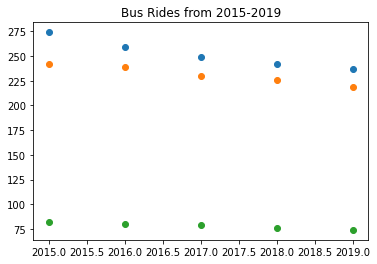

In [8]:
y_values = ["THEYEAR"]
x_values = yearly_transit["CTA_BUS"]
plt.scatter(yearly_transit["THEYEAR"], yearly_transit["CTA_BUS"])
plt.scatter(yearly_transit["THEYEAR"], yearly_transit["CTA_RAIL"])
plt.scatter(yearly_transit["THEYEAR"], yearly_transit["METRA"])
plt.title("Bus Rides from 2015-2019")
plt.xlabel("Year")
plt.ylabel("Average ")
plt.show()

In [168]:
#cta_df = pd.merge(cta_bus_df, cta_rail_df, on="YEAR")

In [169]:
#cta_df